<a href="https://colab.research.google.com/github/wikiban43/fear_speech/blob/main/fear_speech_classifer_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Important methods to be run all the time

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install nltk

In [3]:
def preprocess(text):
  text = text.lower()
  text = text.replace(".","")
  text = text.replace(",","")
  text = text.replace(":","")
  text = text.replace(";","")
  text = text.replace("\'","")
  text = text.replace("\"","")
  text = text.replace("?","")
  text = text.replace("/","")
  text = text.replace(">","")
  text = text.replace("<","")
  text = text.replace("+","")
  text = text.replace("=","")
  text = text.replace(")","")
  text = text.replace("(","")
  text = text.replace("]","")
  text = text.replace("[","")
  text = text.replace("}","")
  text = text.replace("{","")
  text = text.replace("*","")
  text = text.replace("&","")
  text = text.replace("^","")
  text = text.replace("%","")
  text = text.replace("$","")
  text = text.replace("#","")
  text = text.replace("@","")
  text = text.replace("!","")
  text = text.replace('“','')
  text = text.replace('’','')
  text = text.replace('”','')

  return text

In [4]:
def get_clean_text(article):
  '''
  Method to remove all puncts and stopwords from an article and return the clean article.
  '''
  from nltk.corpus import stopwords
  en_stops = set(stopwords.words('english'))
  #print(article)
  try:
    article = preprocess(article)
  except:
    return article
  art_words = article.split(" ")
    #print(art_words)
  clean_art_words=[]
  for word in art_words:
    #word = ''.join(filter(str.isalnum, word))
    if word not in en_stops:
      clean_art_words.append(word)
  article = " ".join(clean_art_words)
  return article

In [5]:
import json
import pandas as pd
#Read huffpost data and convert to df
path = "drive/My Drive/"
#Read dataset and convert it to dataframe
try:
    df = pd.read_csv(path + "fear_speech.csv", delimiter='|')
    df.head()
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    # Print the problematic line for inspection
    with open(path + "fear_speech.csv", 'r') as file:
        for i, line in enumerate(file):
            if i == 20:  # Line numbers are zero-based
                print(f"Line 21: {line}")
                break

In [ ]:
df.head()

,text,labels
0,Administrator Committee Islamic name of...,"Fear speech, Fear speech, Normal ,"
1,Blast 16 killed and 100 injured in Hyderabads...,"Normal, Normal, Normal ,"
2,1 Islam is not a religion but a mental dise...,"Fear speech, Fear speech, Normal ,"
3,JamaateIslami has more resources than Pakista...,"Fear speech, Normal, Normal ,"
4,Urban Naxalism Maoism Just a request start re...,"Normal, Normal, Fear speech ,"


#Load the saved df and run from here

In [ ]:
#df.to_csv(path+"final_data_200K.csv")
import pickle

In [ ]:
!pip3 install transformers

In [ ]:
import pandas as pd
path = "drive/My Drive/"
df = pd.read_csv(path+'fear_speech.csv', delimiter='|')

In [ ]:
len(df['text'][0])

682

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

#example_text = 'I will watch Memento tonight'
#bert_input = tokenizer(example_text,padding='max_length', max_length = 10,truncation=True, return_tensors="pt")


#print(bert_input['input_ids'])
#print(bert_input['token_type_ids'])
#print(bert_input['attention_mask'])

#example_text = tokenizer.decode(bert_input.input_ids[0])

#print(example_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import pandas as pd
import os

In [ ]:
import glob
glob.glob(path)

['drive/My Drive/']

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#df = df_samp
df = df.dropna()
#df[["headline","category"]].astype(str)

df["text"] = df["text"].apply(lambda x: get_clean_text(x))

In [ ]:
def get_majority_label(text):
    text = str(text)
    text_l = text.split(',')
    from collections import Counter
    c = Counter(text_l)
    return c.most_common()[0][0]

df["major_label"]=df["labels"].apply(lambda x: get_majority_label(x))

In [ ]:
df.head()

,text,labels,major_label
0,administrator committee islamic name te...,"Fear speech, Fear speech, Normal ,",Fear speech
1,blast 16 killed 100 injured hyderabads mecca ...,"Normal, Normal, Normal ,",Normal
2,1 islam religion mental disease xi jinping...,"Fear speech, Fear speech, Normal ,",Fear speech
3,jamaateislami resources pakistan 70 bank acco...,"Fear speech, Normal, Normal ,",Fear speech
4,urban naxalism maoism request start reading 1...,"Normal, Normal, Fear speech ,",Normal


In [ ]:
df.major_label.value_counts()

,count
major_label,
Normal,3161
Fear speech,1619


# Contrastive Learning

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
path = "drive/My Drive/"
df_final = pd.read_csv(path+"multiclass_data.csv")
df = df_final
df.fillna('Normal', inplace=True)

df = df[df['label'] != '2a3b']  #Remove label with only one row

In [10]:
df.label.value_counts()

,count
label,
Normal,184
2b3a,47
2b,29
2a3a,14
2a,5
2b3b,4


In [3]:
from sklearn.model_selection import train_test_split
#train_texts, val_texts, train_labels, val_labels = train_test_split(df["text"].tolist(), df["major_label"].tolist(), test_size=0.2, stratify=df["major_label"])


from transformers import AutoTokenizer


#Pretrained tokenizer to tokenize text
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_function(texts):
    #Documents are padded to make them 128 tokens
    return tokenizer(texts, padding="max_length", truncation=True, max_length=128, return_tensors="pt")

# 1. Define a mapping from string labels to numerical labels
label_mapping = {'Normal': 0,'2a':1, '2a3a':2, '2b':3, '2b3a': 4,'2b3b':5}

# 2. Function to convert labels to numerical representation
def encode_labels(labels):
    return [label_mapping[label] for label in labels]

# 3. Split data and encode labels
#Stratify ensures that the label distribution in each split is similar (especially useful in an imbalanced dataset)
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df["text"].tolist(), df["label"].tolist(), test_size=0.2, stratify=df["label"]
)

#Numerical encoding (0 for Normal, 1 for 2a, etc.) for training and text labels
train_labels_encoded = encode_labels(train_labels)  # Encode train labels
val_labels_encoded = encode_labels(val_labels)  # Encode validation labels

#Tokenize the train and validation texts using the tokenize_function
train_encodings = tokenize_function(train_texts) # Call tokenize_function to get encodings for train data
val_encodings = tokenize_function(val_texts)   # Call tokenize_function to get encodings for validation data



#Code to also include a held out test data to perform the final testing
# 3. Split data into train, validation, and test sets
# train_texts, temp_texts, train_labels, temp_labels = train_test_split(
#     df["text"].tolist(), df["label"].tolist(), test_size=0.3, stratify=df["label"], random_state=42  # Adjust test_size as needed
# )
# val_texts, test_texts, val_labels, test_labels = train_test_split(
#     temp_texts, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42
# )



# # 4. Encode labels
# train_labels_encoded = encode_labels(train_labels)
# val_labels_encoded = encode_labels(val_labels)
# test_labels_encoded = encode_labels(test_labels)

# # 5. Tokenize texts
# from transformers import AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# def tokenize_function(texts):
#     return tokenizer(texts, padding="max_length", truncation=True, max_length=128, return_tensors="pt")

# train_encodings = tokenize_function(train_texts)
# val_encodings = tokenize_function(val_texts)
# test_encodings = tokenize_function(test_texts)  # Tokenize test data


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [4]:
#In PyTorch, Dataset is an abstract class that provides a blueprint for how you represent your data
#ContrastiveDataset inherits the abstract class "Dataset" and implements its methods. It is named like that since it is
#specifically used for contrastive learning.
from torch.utils.data import Dataset
import torch
class ContrastiveDataset(Dataset):
    #Initialize the encodings and labels of the instance type with the same passed in the constructor
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels)  # Now labels are numerical

    def __len__(self):
        return len(self.labels)  # Return the number of samples in the dataset

    def __getitem__(self, idx):
      item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
      item['labels'] = self.labels[idx]
      return item



# 4. Create datasets with encoded labels
train_dataset = ContrastiveDataset(train_encodings, train_labels_encoded)
val_dataset = ContrastiveDataset(val_encodings, val_labels_encoded)

In [5]:
import torch.nn as nn
import torch.nn.functional as F

#Contrastive loss class that inherits the nn.Module class and implements its methods like forward
class SupConLoss(nn.Module):
    def __init__(self, temperature=0.07):
        #This temperature parameter is commonly used in contrastive loss functions to control the scaling of the similarity scores.
        super(SupConLoss, self).__init__()
        self.temperature = temperature

    def forward(self, features, labels):
        # Normalize features
        features = F.normalize(features, dim=1)
        #The number of feature matrix rows becomes the batch size
        batch_size = features.shape[0]

        # Compute similarity matrix: features*transpose of features matrix / temperature
        #It calculates the matrix containing similarity values for every pair of data points (multiplies vector of features for datapoint 1 and datapoint 2)
        sim_matrix = torch.matmul(features, features.T) / self.temperature

        # Mask to remove self-comparisons: Diagonal elements of similarity matrix become 0
        mask = torch.eye(batch_size, dtype=torch.bool, device=features.device)
        sim_matrix.masked_fill_(mask, -1e9)

        # Select positive pairs (same label)
        labels = labels.contiguous().view(-1, 1)  #This ensures that the labels tensor is stored in a contiguous block of memory. The view function reshapes "labels" to a column vector.
        #create a matrix called mask_pos by multiplying label vectors. The matrix will have an element as True (1) if the labels are same, and 0 otherwise.
        mask_pos = torch.eq(labels, labels.T).float()

        #Compute contrastive loss: Numerator is the sum of all similarity values (in the matrix) for which labels are same.
        #Denominator is the sum of all similarity values (even if labels are not same)
        numerator = torch.sum(torch.exp(sim_matrix) * mask_pos, dim=1)
        denominator = torch.sum(torch.exp(sim_matrix), dim=1)
        #1e-9 is added to prevent taking the log of 0. Mean calculates the average loss across all datapoints in the batch.
        loss = -torch.log(numerator / denominator + 1e-9).mean()
        return loss

In [6]:
from transformers import AutoModel
#ContrastiveModel inherits Module
class ContrastiveModel(nn.Module):
    def __init__(self, model_name="bert-base-uncased", hidden_dim=768, output_dim=128): # Added output_dim
        super(ContrastiveModel, self).__init__()
        self.encoder = AutoModel.from_pretrained(model_name)
        #Append 768*128 dimension layers to the BERT model (768 is the dimension of the CLS/token vector)
        self.projection = nn.Linear(hidden_dim, output_dim)  # Projection head

    def forward(self, input_ids, attention_mask, token_type_ids=None):
        # Ensure attention_mask is 2D
        # If it's 3D, squeeze it to 2D
        if attention_mask.dim() == 3:
            attention_mask = attention_mask.squeeze(1)
        #Encoder is the BERT model. It takes the input IDs and converts them to outputs.
        #Attention mask prevents attention with padding tokens
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)
        cls_embedding = outputs.last_hidden_state[:, 0]  # CLS token representation
        return self.projection(cls_embedding)  # Projected representation: 128 dimensions finally


from torch.utils.data import DataLoader

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model and loss
model = ContrastiveModel(output_dim=len(label_mapping)).to(device) # output_dim should match the number of classes
contrastive_loss = SupConLoss().to(device)
#The Adam update algorithm with a learning rate of 5e-5 is used
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

# Training
for epoch in range(1):  # 1 epochs
    #Train the ContrastiveModel defined above
    model.train()
    total_loss = 0
    for batch in train_loader:
        #For every batch, reset the gradients of model parameters to 0 to avoid incorrect updates
        optimizer.zero_grad()
        #print(batch.keys())
        #Access the dictionary elements directly (labels is a Contrastive Dataset keyword)
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}  # Extract inputs (excluding labels)
        labels = batch['labels'].to(device) #Extract labels separately
        #Forward pass through the model
        features = model(**inputs)
        #Calculate loss
        loss = contrastive_loss(features, labels)
        #Backpropagation and optimizer step setting
        loss.backward()
        optimizer.step()
        #For one batch, keep adding losses for each datapoint
        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

<ipython-input-4-536adf9a8848>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch 1, Loss: 3.919542384147644


In [7]:
#Fine Tuning the model on training data again (might need change)
class Classifier(nn.Module):
    def __init__(self, contrastive_model, num_classes):
        super(Classifier, self).__init__()
        self.encoder = contrastive_model.encoder  # Use pretrained encoder
        self.fc = nn.Linear(768, num_classes)

    def forward(self, input_ids, attention_mask, token_type_ids=None):
        outputs = self.encoder(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids) # Pass token_type_ids to the encoder if provided
        cls_embedding = outputs.last_hidden_state[:, 0]
        return self.fc(cls_embedding)

# Initialize classifier model
# Ensure num_classes matches the actual number of classes in your data
num_classes = len(label_mapping)  # Get the number of classes from label_mapping
classifier = Classifier(model, num_classes=len(set(train_labels))).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(classifier.parameters(), lr=5e-5)

# Fine-tuning loop (classification)
for epoch in range(1):  # 3 epochs for classification
    classifier.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()

        #inputs, labels = batch
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}  # Extract inputs (excluding labels)
        labels = batch['labels'].to(device) #Extract labels separately

        logits = classifier(**inputs)
        loss = criterion(logits, labels)

        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Classification Epoch {epoch+1}, Loss: {total_loss/len(train_loader)}")

<ipython-input-4-536adf9a8848>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Classification Epoch 1, Loss: 1.2048082192738852


In [9]:
#Testing the model on held out data
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your test data in a DataFrame called 'df_test'
# and have preprocessed and tokenized it similarly to the training data
#test_texts = df_test["text"].tolist()
#test_labels = encode_labels(df_test["label"].tolist())
#test_encodings = tokenize_function(test_texts)

# Assuming you have your test data in a DataFrame called 'df_test'
# and have preprocessed and tokenized it similarly to the training data
#test_texts = df_test["text"].tolist()
#test_labels = encode_labels(df_test["label"].tolist())
#test_encodings = tokenize_function(test_texts)

# Create a test dataset
# Apply encode_labels to val_labels to convert string labels to numerical labels before creating the dataset
test_dataset = ContrastiveDataset(val_encodings, encode_labels(val_labels))

# Create a test data loader
test_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)  # No need to shuffle for testing

# Move the model to the device
classifier.to(device)

# Set the model to evaluation mode
classifier.eval()

# Lists to store predictions and true labels
all_predictions = []
all_true_labels = []

# Perform testing
with torch.no_grad():  # Disable gradient calculation during testing
    for batch in test_loader:
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        true_labels = batch['labels'].to(device)

        # Get model predictions
        logits = classifier(**inputs)
        predictions = torch.argmax(logits, dim=1)

        # Store predictions and true labels
        all_predictions.extend(predictions.cpu().numpy())
        all_true_labels.extend(true_labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_true_labels, all_predictions)
print(f"Test Accuracy: {accuracy:.4f}")

# Generate classification report
report = classification_report(all_true_labels, all_predictions, target_names=label_mapping.keys())
print(report)

<ipython-input-4-536adf9a8848>:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Test Accuracy: 0.6491
              precision    recall  f1-score   support

      Normal       0.65      1.00      0.79        37
          2a       0.00      0.00      0.00         1
        2a3a       0.00      0.00      0.00         3
          2b       0.00      0.00      0.00         6
        2b3a       0.00      0.00      0.00         9
        2b3b       0.00      0.00      0.00         1

    accuracy                           0.65        57
   macro avg       0.11      0.17      0.13        57
weighted avg       0.42      0.65      0.51        57



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Prevent Inactivity

from IPython.display import Javascript

def keep_colab_awake():
    js_code = """
        function preventDisconnect() {
            console.log("Preventing disconnect...");
            document.querySelector("colab-connect-button").click();
        }
        setInterval(preventDisconnect, 60000);
    """
    display(Javascript(js_code))

keep_colab_awake()

<IPython.core.display.Javascript object>

# Normal Fear Speech (Single Label) Classification

In [ ]:
import torch

In [ ]:
import torch
torch.cuda.empty_cache()
import numpy as np
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')
labels = {'Normal':0,'Fear speech':1,}
#labels = d
class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):
        #print(labels)
        #Get the labels and the tokenized text (padded if necessary) in two variables
        try:
          self.labels = [labels[label] for label in df['major_label']]
        except:
          print("Categories unnecessary or incorrect.")
        self.texts = [tokenizer(text,
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]

    def classes(self):
        #Get labels
        return self.labels

    def __len__(self):
        #Get number of labels
        return len(self.labels)

    def get_batch_labels(self, idx):
        # Fetch a batch (certain list) of labels
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        # Fetch a batch (certain list) of inputs
        return self.texts[idx]

    def __getitem__(self, idx):
        #Get a batch of inputs and labels together
        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [ ]:
df = df.drop("labels",axis=1)
df.head()
#df.shape

KeyError: "['labels'] not found in axis"

In [ ]:
df.shape

(4780, 2)

In [ ]:
#np.random.seed(112)
df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42),
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

3824 478 478


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()
        #Initialize the pretrained bert model, dropout, linear, and relu layers
        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 41)  #Dimensions of the final CLS embedding and the number of labels
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):
        # Ensure mask is 2D
        mask = mask.squeeze(1)
        #Get the pooled output by running bert on the input IDs
        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        #Get the dropped out output
        dropout_output = self.dropout(pooled_output)
        #Get the linear output
        linear_output = self.linear(dropout_output)
        #Get the final output
        final_layer = self.relu(linear_output)

        return final_layer

In [ ]:
df_train.major_label.unique()

NameError: name 'df_train' is not defined

In [ ]:
from torch.optim import Adam
from tqdm import tqdm
import pickle


def train(model, train_data, val_data, learning_rate, epochs):
    #Get the texts and labels for train and validation data
    train, val = Dataset(train_data), Dataset(val_data)
    #Batch size
    bs = 8
    #Get the train and validation data loaders (memory efficient versions by torch)
    train_dataloader = torch.utils.data.DataLoader(train, batch_size=bs, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=bs)
    #If GPU is available use GPU or CPU
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")
    #Cross entropy loss
    criterion = nn.CrossEntropyLoss()
    #Adam or any other optimizer
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            #from torchsummary import summary
            #print(summary(model,input_size=(768,),depth=1,batch_dim=1, dtypes=['torch.IntTensor']))
            #print(summary(model,(1,512,300)))

            criterion = criterion.cuda()
    else:
      torch.load(map_location=torch.device('cpu'))

    #For each epoch
    for epoch_num in range(0,epochs):
            #Initialize train and validation accuracy
            total_acc_train = 0
            total_loss_train = 0
            #print(next(iter(train_dataloader))[0])
            #For each input text and label in the train dataloader
            for train_input, train_label in tqdm(train_dataloader):
                #Load the train labels (size = batch size) in memory using the device being used
                #print(train_label)
                train_label = train_label.to(device)
                #Load the mask of the training data in the memory
                mask = train_input['attention_mask'].to(device)
                #print(mask)
                #Load the the training data (size = batch size) in the memory
                input_id = train_input['input_ids'].squeeze(1).to(device)
                #print(input_id)
                #Do the forward pass on the model
                output = model(input_id, mask)
                #Get the batch loss
                batch_loss = criterion(output, train_label.long())
                #Calculate total loss till this batch loss
                total_loss_train += batch_loss.item()
                #Get the accuracy for this batch
                acc = (output.argmax(dim=1) == train_label).sum().item()
                #Add to the total training accuracy
                total_acc_train += acc

                model.zero_grad()
                #Backpropagation
                batch_loss.backward()
                optimizer.step()
            #Repeat the same steps as above for validation data
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()

                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            #Print the performance metric for this epoch
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
            pickle.dump(model,open(path+"fear_speech_classification.epoch"+str(epoch_num)+".pickle","wb"))
    #return model

EPOCHS = 10
model = BertClassifier()
#model = torch.load(open(path+"topic_classification_model_sample.epoch"+str(11)+".pickle"),map_location=torch.device('cpu'))
#model = pickle.load(open(path+"topic_classification_model_sample.epoch"+str(2)+".pickle","rb"))
#model = pickle.load(open(path+"topic_classification_model_new.epoch"+str(4)+".pickle","rb"))
LR = 1e-6

train(model, df_train, df_val, LR, EPOCHS)


100%|██████████| 478/478 [05:46<00:00,  1.38it/s]


Epochs: 1 | Train Loss:  0.227                 | Train Accuracy:  0.534                 | Val Loss:  0.127                 | Val Accuracy:  0.674


100%|██████████| 478/478 [05:52<00:00,  1.36it/s]


Epochs: 2 | Train Loss:  0.109                 | Train Accuracy:  0.662                 | Val Loss:  0.098                 | Val Accuracy:  0.690


100%|██████████| 478/478 [05:52<00:00,  1.35it/s]


Epochs: 3 | Train Loss:  0.089                 | Train Accuracy:  0.685                 | Val Loss:  0.090                 | Val Accuracy:  0.692


100%|██████████| 478/478 [05:52<00:00,  1.35it/s]


Epochs: 4 | Train Loss:  0.079                 | Train Accuracy:  0.727                 | Val Loss:  0.080                 | Val Accuracy:  0.707


100%|██████████| 478/478 [05:52<00:00,  1.35it/s]


Epochs: 5 | Train Loss:  0.070                 | Train Accuracy:  0.758                 | Val Loss:  0.078                 | Val Accuracy:  0.709


100%|██████████| 478/478 [05:52<00:00,  1.35it/s]


Epochs: 6 | Train Loss:  0.062                 | Train Accuracy:  0.796                 | Val Loss:  0.083                 | Val Accuracy:  0.715


100%|██████████| 478/478 [05:52<00:00,  1.36it/s]


Epochs: 7 | Train Loss:  0.055                 | Train Accuracy:  0.836                 | Val Loss:  0.082                 | Val Accuracy:  0.699


100%|██████████| 478/478 [05:52<00:00,  1.35it/s]


Epochs: 8 | Train Loss:  0.048                 | Train Accuracy:  0.860                 | Val Loss:  0.074                 | Val Accuracy:  0.720


100%|██████████| 478/478 [05:52<00:00,  1.36it/s]


Epochs: 9 | Train Loss:  0.040                 | Train Accuracy:  0.900                 | Val Loss:  0.079                 | Val Accuracy:  0.701


100%|██████████| 478/478 [05:52<00:00,  1.35it/s]


Epochs: 10 | Train Loss:  0.033                 | Train Accuracy:  0.925                 | Val Loss:  0.084                 | Val Accuracy:  0.690


In [ ]:
while True:pass

KeyboardInterrupt: 

In [ ]:
import pickle
import  matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn.metrics import confusion_matrix
path = "drive/My Drive/"
classes = ('Normal','Fear speech')
def evaluate(model, test_data):
    # Initialize misclassifications dictionary
    misclassifications = {
        'Normal': {'Normal': 0, 'Fear speech': 0},
        'Fear speech': {'Normal': 0, 'Fear speech': 0}
    }
    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=8)

    #use_cuda = torch.cuda.is_available()
    #device = torch.device("cuda" if use_cuda else "cpu")

    #In mandatory cpu mode
    device = torch.device("cuda")

    #if use_cuda:
    #    model = model.cuda()
    y_true = []
    y_pred = []
    total_acc_test = 0
    all_predictions = []
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              #output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
              y_true.extend(test_label.cpu())

              #print(test_label)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)
              #Output is 41,batchsize dimensional. 41 is the number of labels in the data
              output = model(input_id, mask)
              y_pred.extend(output.argmax(dim=1).cpu())  # Save Prediction
              predictions = output.argmax(dim=1).cpu()
              all_predictions.extend(predictions.tolist())

              # Track misclassifications
              for true_label, pred_label in zip(test_label.cpu(), predictions):
                if true_label != pred_label:
                    misclassifications[classes[true_label]][classes[pred_label]] += 1

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    # Add predicted column to the test_data DataFrame
    test_data['predicted'] = all_predictions
    # Convert predicted values to class labels
    test_data['predicted'] = test_data['predicted'].apply(lambda x: classes[x])

    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    #Print misclassification counts
    print("\nMisclassifications:")
    for true_label, pred_counts in misclassifications.items():
        for pred_label, count in pred_counts.items():
            print(f"  {true_label} -> {pred_label}: {count}")


    # Build confusion matrix
    cf_matrix = confusion_matrix(y_true, y_pred)
    df_cm = pd.DataFrame(cf_matrix / np.sum(cf_matrix, axis=1)[:, None], index = [i for i in classes],
                        columns = [i for i in classes])
    plt.figure(figsize = (12,7))
    sn.heatmap(df_cm, annot=True)
    plt.savefig('output.png')
    plt.show()
    return test_data

#model = pickle.load(open(path+"fear_speech_classification.epoch9.pickle","rb"))
#infer_topic(model, df_final_test)
#evaluate(model,df_test)






In [ ]:
#df_final_test.head()
df_test['major_label'].value_counts()

,count
major_label,
Normal,309
Fear speech,169


In [ ]:
!pip install tensorflow_hub
!pip install tensorflow_text

# Preparing annotated data (new one with multiple labels)

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import pandas as pd
from collections import Counter
def extract_label_only(text):
  try:
    text = text.split('-')
    text = text[0].rstrip()
  except:
    text = ''
  return text


df2 = pd.read_csv(path+"fear speech coding _Nov 24 - Coding.tsv",delimiter='\t')
df2["Ishika"] = df2['Ishika\'s comments'].apply(lambda x: extract_label_only(x))
df2['label'] = ['']*df2.shape[0]

for i in range(0,df2.shape[0]):
  annotations = [df2['Siya'][i],df2['Sushmit'][i],df2['Tisha'][i],df2['Miti'][i],df2['Ishika'][i]]
  c = Counter(annotations)
  major_label = c.most_common()[0]
  df2['label'][i] = major_label[0]


df2['Message'] = df2['Message'].apply(lambda x: x.replace("\n"," "))
df2['Message'] = df2['Message'].apply(lambda x: x.replace("\r"," "))
df2['Message'] = df2['Message'].apply(lambda x: x.replace("\t"," "))
df2['Message'] = df2['Message'].apply(lambda x: get_clean_text(x))




df2.head()

<ipython-input-7-4ee3cdb76335>:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2['label'][i] = major_label[0]
<ipython-input-7-4ee3cdb76335>:20: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting 

,Message,Ishika's comments,Siya,Sushmit,Tisha,Miti,Ishika,label
0,44 soldiers martyred major terrorist attack ye...,2b3a - violent fear due to mentions of terrors...,2b3a,2b3a,2b3a,2b3a,2b3a,2b3a
1,üåäüåäüåäüåäüåäüåäüåä üåä üåä üåä ...,"2b3a - mention of islamic terrorism, jihadis e...",2b3a,2b3a,2b3a,2b3a,2b3a,2b3a
2,police arrested 63 children madrasa raja bazar...,2b3a - message is saying madrasas are training...,2b3a,2b3a,2b3a,2b3a,2b3a,2b3a
3,sharmankhan incident minor daughter hindu s...,2b3a,2b3a,2b3a,2b3a,2b3a,2b3a,2b3a
4,valentine_and_business organtransplant - orga...,2b3a - message is implying that through love j...,2b3a,2b3a,2b3a,2b3a,2b3a,2b3a


In [8]:
df2 = df2.fillna('None')
df2.loc[df2['label']=='None']

,Message,Ishika's comments,Siya,Sushmit,Tisha,Miti,Ishika,label
15,agra¬†bjp workers aligarh urged union hrd mini...,I would code this as NA because it seems more ...,None,None,None,None,I would code this as NA because it seems more ...,None
62,muslims children devil prove heard demons rec...,None,None,None,2b3a,2b3a,,None
63,today pulwama kashmiri terrorists killed 30 ja...,None,None,None,2b3a,2b3a,,None
64,üá™ üá™ üá™ üá™ üá∫ üá∫ üá™ üá™ üá...,None,None,None,2b,2b,,None
65,soon condition indian railways going like bsn...,None,None,None,2a3a,2a3a,,None
...,...,...,...,...,...,...,...,...
140,surf excel sample see reality show spoils hind...,None,None,None,2a,2a,,None
141,üö© sweated listening condition pakistans h...,None,None,None,2b3a,2b3a,,None
142,opponents stopped defeated üö© üö© times ...,None,None,None,2a3a,2a3a,,None
143,today pulwama kashmiri terrorists killed 30 ja...,None,None,None,2b3a,2b3a,,None


In [9]:
df2.label.value_counts()

,count
label,
None,84
2b3a,47
2b,29
2a3a,14
2a,5
2b3b,4
2a3b,1


In [10]:
#Annotate nan labels as Normal and rest as Fear speech
df2['final_label'] = df2['label'].apply(lambda x: 'Normal' if x=='None' else 'Fear speech')
df2.rename(columns={'Message':'text','final_label':'major_label'},inplace=True)
#df2.rename(columns={'final_label':'major_label'},inplace=True)
df3 = df2[['text','label','major_label']]

In [12]:
df3.label.value_counts()

,count
label,
None,84
2b3a,47
2b,29
2a3a,14
2a,5
2b3b,4
2a3b,1


## Load Negative (non-fear) data

In [13]:
import pandas as pd
#Load negative test data
sheets_dict = pd.read_excel(path+'Fear_nonfear.xlsx', engine="openpyxl", sheet_name="Coding")
print(sheets_dict.keys())
#df = sheets_dict['Coding']
#df.head()
df_neg = pd.DataFrame(sheets_dict)
df_neg = df_neg[['tweet']]
df_neg.rename(columns={'tweet':'text'},inplace=True)
df_neg['text'] = df_neg["text"].apply(lambda x: get_clean_text(x))
df_neg['major_label'] = ['Normal']*df_neg.shape[0]
df_neg['label'] = ['None']*df_neg.shape[0]
df_neg = df_neg.head(100)

Index(['tweet', 'Code', 'Remarks'], dtype='object')


In [14]:
df_final = pd.concat([df3,df_neg],axis=0).reset_index()

In [15]:
df_final.shape

(284, 4)

In [16]:
df_final.to_csv(path+"multiclass_data.csv")

Test Accuracy:  0.694

Misclassifications:
  Normal -> Normal: 0
  Normal -> Fear speech: 53
  Fear speech -> Normal: 34
  Fear speech -> Fear speech: 0


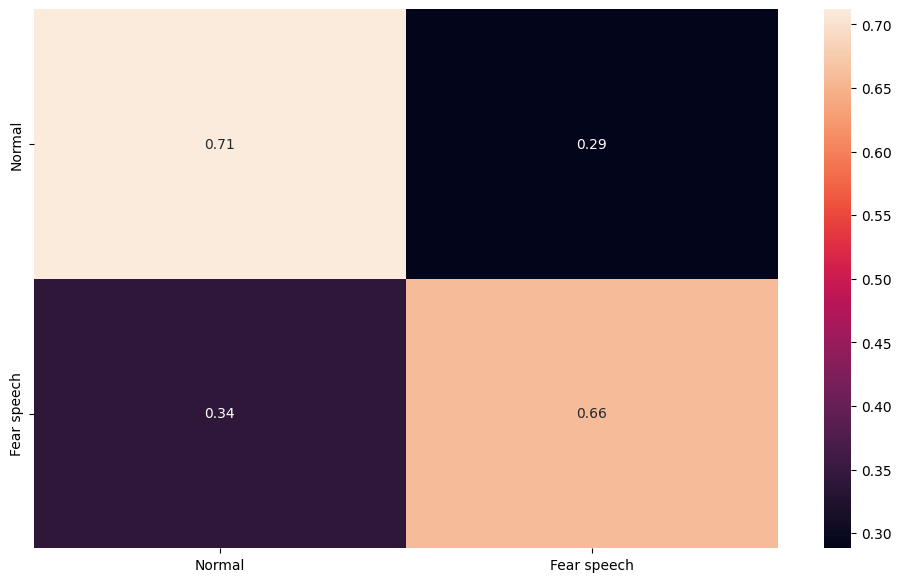

In [ ]:
import pickle
model = pickle.load(open(path+"fear_speech_classification.epoch9.pickle","rb"))
#infer_topic(model, df_final_test)
df_pred = evaluate(model,df_final)

In [ ]:
#Fear speech classified as Normal
df_temp1 = df_pred.loc[(df_pred['label']!='None')&(df_pred['predicted']=='Normal')]
#Normal speech classified as fear
df_temp2 = df_pred.loc[(df_pred['label']=='None')&(df_pred['predicted']=='Fear speech')]

In [ ]:
df_temp2['text'].tail(20)

,text
121,one maltreated young girls governments silent...
122,httpsyoutubebsja4fnxr_e muslims want occupy i...
123,‚öú ‚õ≥ jail anasatan ‚öú ‚õ≥ ‚öú ‚õ≥ dha...
124,nathuram_godse - patriot killer people busy c...
128,akhilesh yadav made jehadi like azam khan fair...
129,dreadful report bengal coming america created ...
131,‚¨ü responsibility hindus pakistan india reen...
132,‡§ú‡§ø üá™ üá∫ üá∫ üá™ jai bhim üá∫ ...
133,preparations big scandal going india seen symp...
136,üï∏ üï∏ ashok bhartis report situation hin...


In [ ]:
df_neg.head()

,text,major_label,label
0,indiafightscorona pm narendramodi said wonder...,Normal,None
1,bjps tomvadakkan2 assures shaheenbagh proteste...,Normal,None
2,cases people tested positive covid19 amp fleei...,Normal,None
3,virtually hid son protect family endangered us...,Normal,None
4,aware rural punjab coronavirus threat people t...,Normal,None


In [ ]:
df.head()

,tweet,Code,Remarks
0,IndiaFightsCorona PM narendramodi said it is ...,NaN,NaN
1,BJPs TomVadakkan2 assures ShaheenBagh proteste...,NaN,NaN
2,Cases of people tested positive for COVID19 am...,1,NaN
3,She virtually hid her son to protect her famil...,NaN,NaN
4,How aware is rural Punjab about Coronavirus th...,NaN,NaN
